# 김유은 github : https://github.com/YueunKim

## 1번 

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [2]:
iris = load_iris()
log = LogisticRegression()
kfold = KFold(n_splits=5, shuffle = True, random_state = 2020)

In [3]:
scores = cross_val_score(log, iris.data, iris.target, cv=kfold)
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [0.86666667 1.         1.         0.96666667 1.        ]


C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

## 2번

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
x_train = train_images / 255.0
x_test = test_images / 255.0

In [29]:
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.5025 - accuracy: 0.8238
Epoch 2/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3777 - accuracy: 0.8638
Epoch 3/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3398 - accuracy: 0.8762
Epoch 4/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3151 - accuracy: 0.8845
Epoch 5/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2981 - accuracy: 0.8907


In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 0s - loss: 0.3407 - accuracy: 0.8782

테스트 정확도: 0.8782


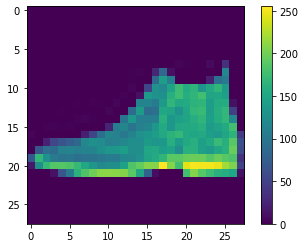

In [35]:
# 0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인
predictions = model.predict(test_images)

plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [36]:
# 0개 클래스에 대한 예측을 모두 그래프로 표현

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [37]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

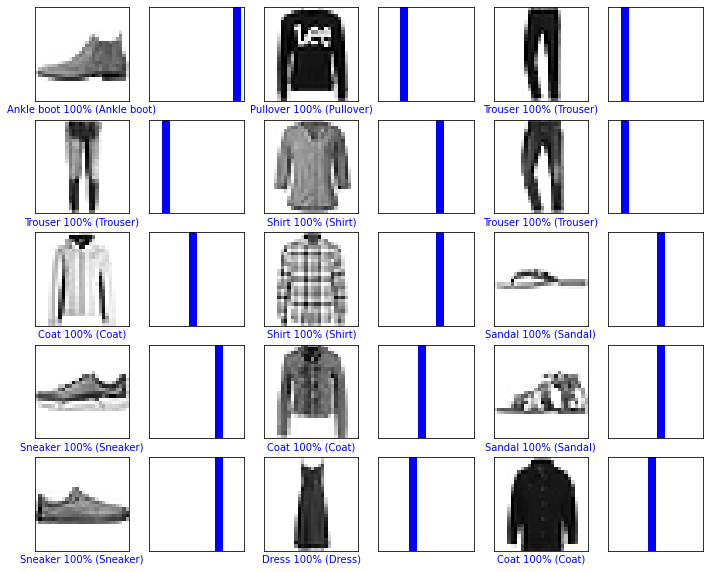

In [38]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

## 3번

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [56]:
df = pd.read_csv("dataset/labeledTrainData.tsv", header = 0, delimiter = '\t')
df = df.drop(['id'], axis=1)
df.rename(columns={'sentiment': 0, 'review': 1}, inplace=True)
df.head()

,0,1
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [82]:
dataset = df.values
X = np.array(dataset[:,0:1], dtype=np.float64)
Y= dataset[:,0]

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True,
                                                    random_state=2020,)

In [84]:
len(x_train), len(x_test)

(20000, 5000)

In [85]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences

In [86]:
max_len = 500
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [87]:
# LSTM 모델
model = Sequential()
model.add(Embedding(5000, 120))
model.add(LSTM(120))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 120)         600000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               115680    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 121       
Total params: 715,801
Trainable params: 715,801
Non-trainable params: 0
_________________________________________________________________


In [88]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [89]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('model/imdb_lstm_best_model.h5', monitor='val_accuracy', 
                     verbose=1, mode='max', save_best_only=True)

In [90]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5,
                    batch_size=1000, callbacks=[mc, es])

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 121s 6ms/step - loss: 0.6278 - accuracy: 0.7776 - val_loss: 0.5027 - val_accuracy: 1.0000

Epoch 00001: val_accuracy improved from -inf to 1.00000, saving model to model/imdb_lstm_best_model.h5
Epoch 2/5
20000/20000 [==============================] - 135s 7ms/step - loss: 0.2879 - accuracy: 1.0000 - val_loss: 0.0701 - val_accuracy: 1.0000

Epoch 00002: val_accuracy did not improve from 1.00000
Epoch 3/5
20000/20000 [==============================] - 152s 8ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000

Epoch 00003: val_accuracy did not improve from 1.00000
Epoch 4/5
20000/20000 [==============================] - 165s 8ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 5/5
20000/20000 [==============================] - 184s 9ms/step - loss: 0.0015 - acc

In [91]:
# Best Model 선택
from keras.models import load_model
#del model
model = load_model('model/imdb_lstm_best_model.h5')

C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [92]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['accuracy']

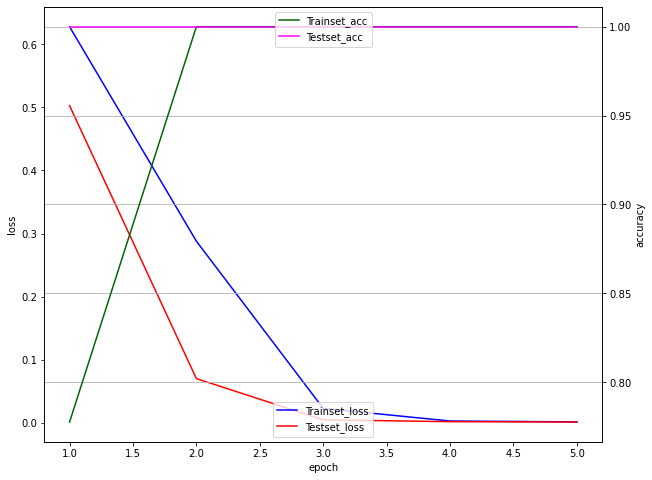

In [93]:
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='lower center')
ax1.legend(loc='upper center')
plt.grid()
plt.show()